# Checking the $L_{xy}$ and $L_z$ cuts

Plot the $L_{xy}$ and $L_z$ cuts for the different eta regions to make sure we are doing this right.

In [1]:
from calratio_training_data import fetch_training_data, RunConfig
from hist import Hist
import mplhep
import matplotlib.pyplot as plt
import awkward as ak

Run a query to get a local dataset (you'll have to have the file local for this to work):

In [2]:
# Assume we are in the local directory of the notebook
ds_name = "../DAOD_LLP1.outputLLP1_mc23_527565_LeadingJets_08042025.pool.root"

full_data = fetch_training_data(ds_name, RunConfig(ignore_cache=False, run_locally=False, mc=True))

Unknown type for name sqrt


Plot $L_{xy}$ and $L_z$:

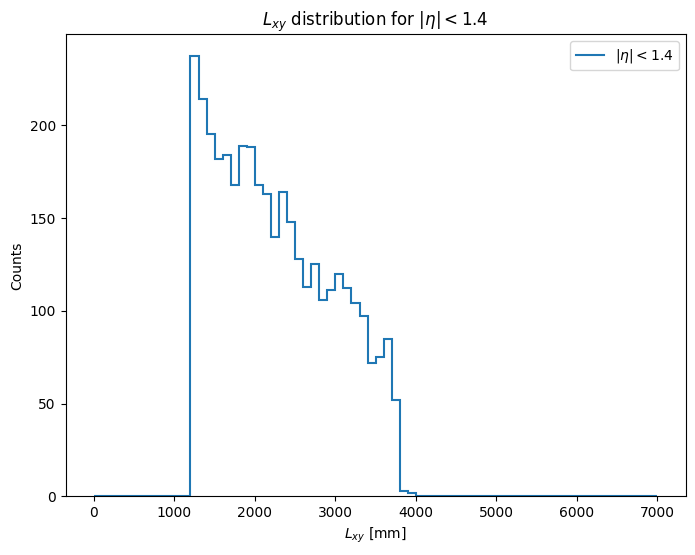

In [3]:
# Select LLPs with |eta| < 1.4
mask = abs(full_data.llp.eta) < 1.4
lxy_values = full_data.llp.Lxy[mask]

# Create histogram
hist_lxy = Hist.new.Reg(70, 0.0, 7000, name="Lxy", label="$L_{xy}$ [mm]").Double()
hist_lxy.fill(lxy_values)

# Plot
plt.figure(figsize=(8, 6))
mplhep.histplot(hist_lxy, label=r"$| \eta | < 1.4$", yerr=False)
plt.xlabel("$L_{xy}$ [mm]")
plt.ylabel("Counts")
plt.legend()
plt.title("$L_{xy}$ distribution for $|\\eta| < 1.4$")
plt.show()

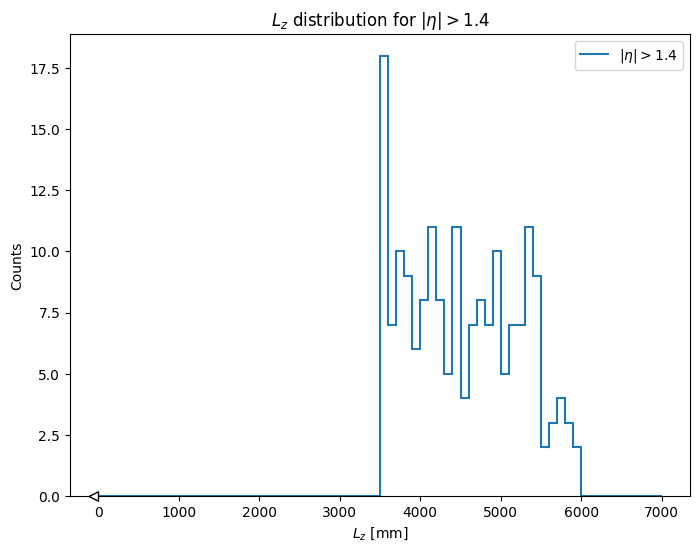

In [4]:
# Select LLPs with |eta| > 1.4 for Lz
mask_eta_gt_1p4 = ~mask
lz_values_gt_1p4 = full_data.llp.Lz[mask_eta_gt_1p4]

# Create histogram for Lz
hist_lz_gt_1p4 = Hist.new.Reg(70, 0.0, 7000, name="Lz", label="$L_{z}$ [mm]").Double()
hist_lz_gt_1p4.fill(lz_values_gt_1p4)

# Plot
plt.figure(figsize=(8, 6))
mplhep.histplot(hist_lz_gt_1p4, label=r"$| \eta | > 1.4$", yerr=False)
plt.xlabel("$L_{z}$ [mm]")
plt.ylabel("Counts")
plt.legend()
plt.title("$L_{z}$ distribution for $|\\eta| > 1.4$")
plt.show()